In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset load
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

# Basic check
print(df.head())
print(df.info())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
# Column names strip
df.columns = df.columns.str.strip()

# Remove null ratings
df = df.dropna(subset=['Rating'])

# Convert Rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Clean Year & Duration
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)').astype(float)

print(df.isnull().sum())



Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64


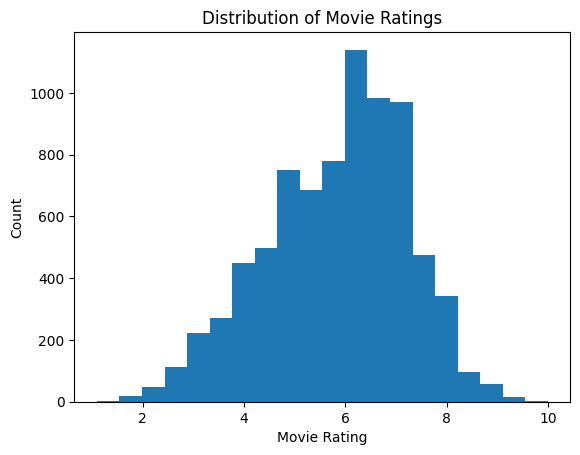

In [6]:
plt.figure()
plt.hist(df['Rating'], bins=20)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()


C:\Users\rarun\AppData\Local\Temp\ipykernel_23156\607172305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['Genre'] = df_genre['Genre'].str.split(', ')


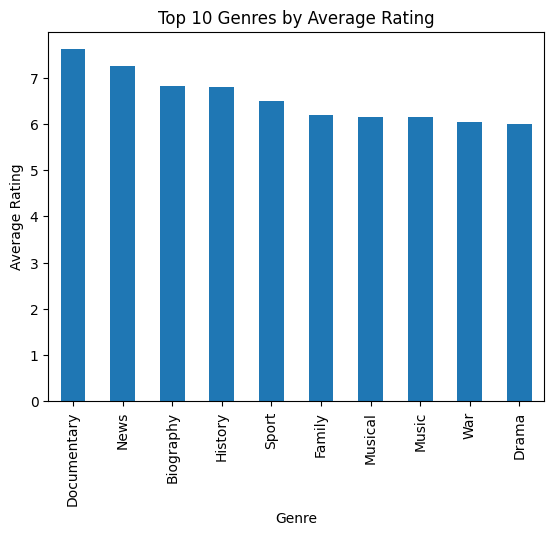

In [7]:
# Split genres
df_genre = df.dropna(subset=['Genre'])
df_genre['Genre'] = df_genre['Genre'].str.split(', ')
df_genre = df_genre.explode('Genre')

top_genres = df_genre.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure()
top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.show()


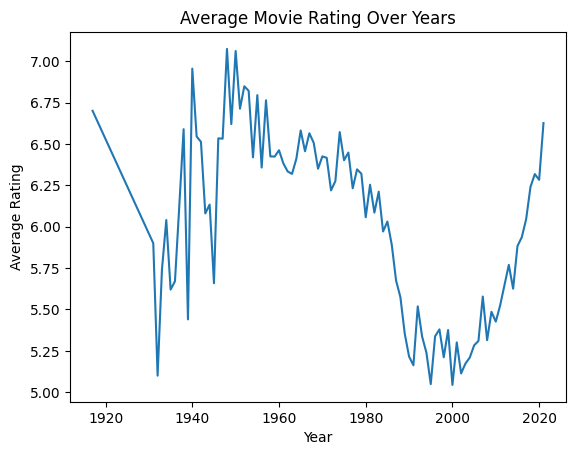

In [8]:


year_rating = df.groupby('Year')['Rating'].mean()

plt.figure()
plt.plot(year_rating.index, year_rating.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over Years')
plt.show()


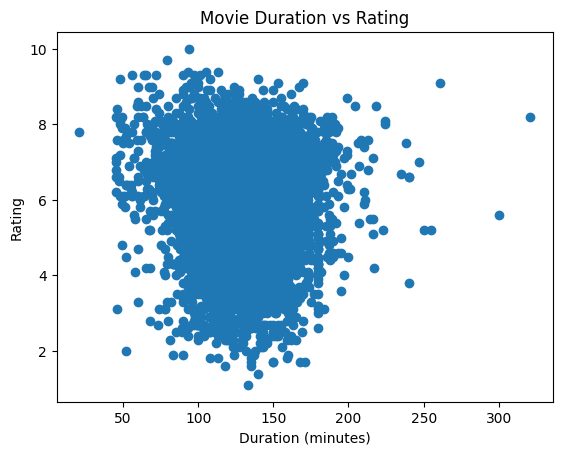

In [9]:
plt.figure()
plt.scatter(df['Duration'], df['Rating'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Movie Duration vs Rating')
plt.show()


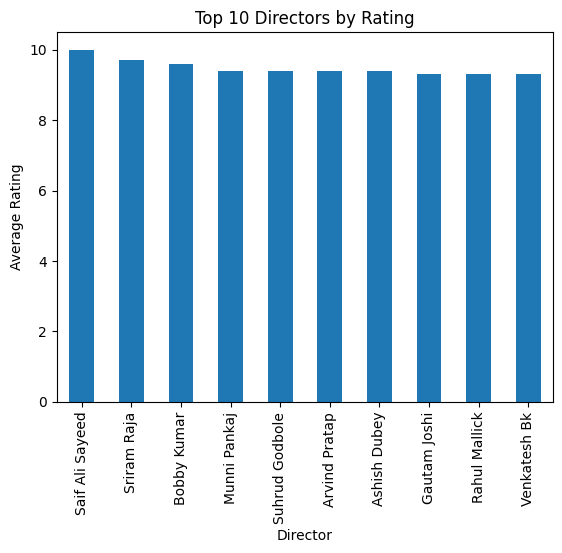

In [10]:
top_directors = (
    df.dropna(subset=['Director'])
    .groupby('Director')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_directors.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Rating')
plt.show()


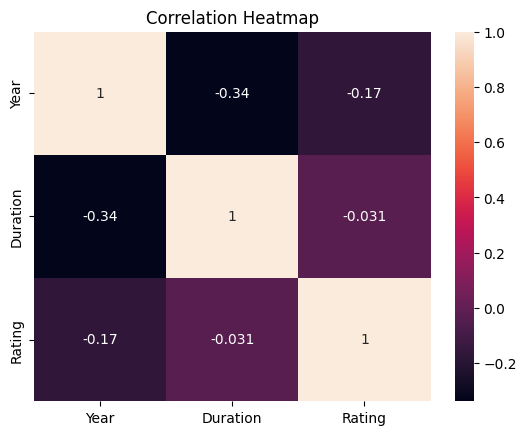

In [11]:
numeric_df = df[['Year', 'Duration', 'Rating']]

plt.figure()
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Year', 'Duration']].fillna(0)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model R² Score:", model.score(X_test, y_test))


Model R² Score: 0.04204894025907635
